In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns


In [47]:
# instansiate a panda dataframe with our csv file
diabetes_dataset = pd.read_csv('diabetes.csv') 
diabetes_dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
#Remove data columns that our user will not be able to readily provide on their own
diabetes_dataset = diabetes_dataset.drop(columns = ['SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BloodPressure'],
                                         axis=0)
diabetes_dataset.head(5)

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1


<AxesSubplot:xlabel='Outcome', ylabel='Outcome'>

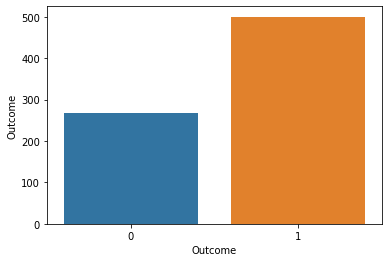

In [49]:
#this barplot shows the number of non-diabetic patients vs diabetic patients in our dataset
sns.barplot(x='Outcome', y=diabetes_dataset['Outcome'].value_counts(), data=diabetes_dataset)

<AxesSubplot:xlabel='Age', ylabel='Density'>

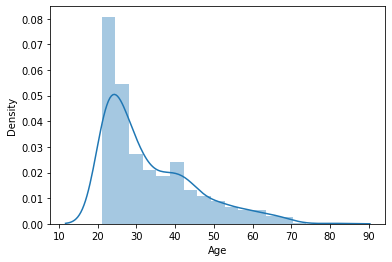

In [50]:
#the following distribution plot shows the age distribution of our dataset
# We can see the most dense age group is 20-30 years old
sns.distplot(diabetes_dataset['Age'])

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

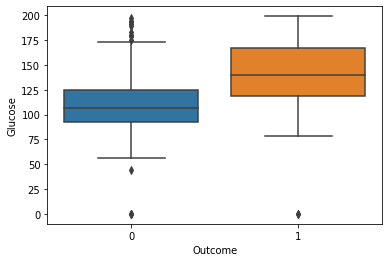

In [51]:
# the following boxplot visual shows us the comparison
# between glucose levels in non-diabetic patients
# vs glucose levels in diabetic patients
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_dataset)

In [52]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [54]:
model = svm.SVC(kernel='linear', probability=True)

In [55]:
# train the model
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [56]:
# generate the accuracy score for the training data
X_train_prediction = model.predict(X_train)
trainDataAccuracy = accuracy_score(X_train_prediction, Y_train)

In [57]:
print('train data accuracy ', trainDataAccuracy)

train data accuracy  0.7752442996742671


In [58]:
# generate the accuracy score for the test data
X_test_prediction = model.predict(X_test)
testDataAccuracy = accuracy_score(X_test_prediction, Y_test)

In [59]:
print('test data accuracy ', testDataAccuracy)

test data accuracy  0.7532467532467533


In [60]:
import anvil.server

anvil.server.connect('E56QE74RLMUW73ATOLTIRETU-YYHMPFXUCLC5FLK4')

In [61]:
@anvil.server.callable
def predict_user_data(userInput):
    userInput_as_numpy_array = np.asarray(userInput)
    userInput_reshaped = userInput_as_numpy_array.reshape(1,-1)
    prediction = model.predict(userInput_reshaped)
    predprob = model.predict_proba(userInput_reshaped)
    maxprob = max(predprob[0][0], predprob[0][1])
    maxprob = maxprob * 100
    maxprob = "{:.2f}".format(maxprob)
    print(prediction)
    if (prediction[0] == 0):
      return('You are not diabetic', maxprob)
    else:
      return('You are diabetic', maxprob)

# https://YYHMPFXUCLC5FLK4.anvil.app/HTKLFKUXWHKEYVX3ED3TPJQR

In [67]:
anvil-uplink.__version__

AttributeError: module 'anvil' has no attribute '__version__'

In [64]:
import watermark

%load_ext watermark

%watermark -v -m -p numpy,pandas,sklearn,seaborn,jupyter,watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.0
IPython version      : 7.32.0

numpy    : 1.21.6
pandas   : 1.1.5
sklearn  : 0.0
seaborn  : 0.11.2
jupyter  : 1.0.0
watermark: 2.3.0

Compiler    : MSC v.1914 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

